In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [4]:
X_train.shape[1:]

(28, 28)

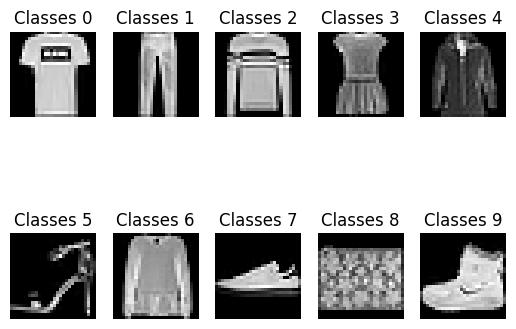

In [5]:
for i in range(num_classes):
    idx = np. where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title(f"Classes {i}")
    plt.axis('off')
plt.show()

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### FCNN

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [8]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [9]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [10]:
fcnn = Sequential([
    Dense(256, activation = 'relu', input_shape=(784,)),
    Dense(128, activation = 'relu'),
    Dense(num_classes, activation = 'softmax')
])

C:\Users\BEDANTA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
fcnn.compile(optimizer = Adam(learning_rate = 0.001),
             loss = "categorical_crossentropy",
             metrics = ['accuracy']
            )

In [12]:
history_fcnn = fcnn.fit(X_train_flat, y_train_cat,
                        validation_split = 0.1,
                        epochs = 20,
                        batch_size = 64,
                        verbose = 1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8243 - loss: 0.4984 - val_accuracy: 0.8592 - val_loss: 0.3995
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8674 - loss: 0.3654 - val_accuracy: 0.8620 - val_loss: 0.3664
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8793 - loss: 0.3310 - val_accuracy: 0.8635 - val_loss: 0.3708
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8890 - loss: 0.3056 - val_accuracy: 0.8768 - val_loss: 0.3344
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8949 - loss: 0.2837 - val_accuracy: 0.8828 - val_loss: 0.3263
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8984 - loss: 0.2712 - val_accuracy: 0.8812 - val_loss: 0.3264
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9041 - loss: 0.2567 - val_accuracy: 0.8890 - val_loss: 0.3156
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9079 - loss: 0.2481 - val_ac

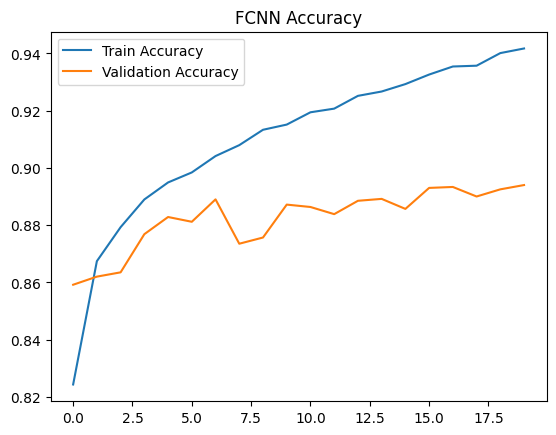

In [13]:
plt.plot(history_fcnn.history['accuracy'],label = 'Train Accuracy')
plt.plot(history_fcnn.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('FCNN Accuracy')
plt.legend()
plt.show()

### CNN-1

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [15]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [17]:
cnn1 = Sequential([
    Conv2D(32, (5,5), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(num_classes, activation = 'softmax')
])

In [18]:
cnn1.compile(optimizer = Adam(learning_rate = 0.001),
             loss = "categorical_crossentropy",
             metrics = ['accuracy']
            ) 

In [20]:
history_cnn1 = cnn1.fit(X_train_cnn, y_train_cat,
                        validation_split = 0.1,
                        epochs = 20,
                        batch_size = 64,
                        verbose = 1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8405 - loss: 0.4497 - val_accuracy: 0.8805 - val_loss: 0.3339
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8913 - loss: 0.3049 - val_accuracy: 0.8873 - val_loss: 0.3134
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9053 - loss: 0.2611 - val_accuracy: 0.9057 - val_loss: 0.2699
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9143 - loss: 0.2319 - val_accuracy: 0.9040 - val_loss: 0.2589
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9231 - loss: 0.2083 - val_accuracy: 0.9102 - val_loss: 0.2517
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9303 - loss: 0.1901 - val_accuracy: 0.9072 - val_loss: 0.2613
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9378 - loss: 0.1688 - val_accuracy: 0.9020 - val_loss: 0.2758
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9442 - loss: 0.1512 - 

### CNN-2

In [23]:
cnn2 = Sequential([
    Conv2D(32, (3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [24]:
cnn2.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
history_cnn2 = cnn2.fit(X_train_cnn, y_train_cat,
                        validation_split=0.1,
                        epochs=20,
                        batch_size=64,
                        verbose=1
                       )

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.8473 - loss: 0.4267 - val_accuracy: 0.8907 - val_loss: 0.3072
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9014 - loss: 0.2736 - val_accuracy: 0.9077 - val_loss: 0.2495
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9176 - loss: 0.2245 - val_accuracy: 0.9188 - val_loss: 0.2333
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9293 - loss: 0.1889 - val_accuracy: 0.9165 - val_loss: 0.2349
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9401 - loss: 0.1608 - val_accuracy: 0.9165 - val_loss: 0.2293
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9495 - loss: 0.1355 - val_accuracy: 0.9213 - val_loss: 0.2307
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9582 - loss: 0.1112 - val_accuracy: 0.9208 - val_loss: 0.2468
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9660 - loss: 0.0915 - 

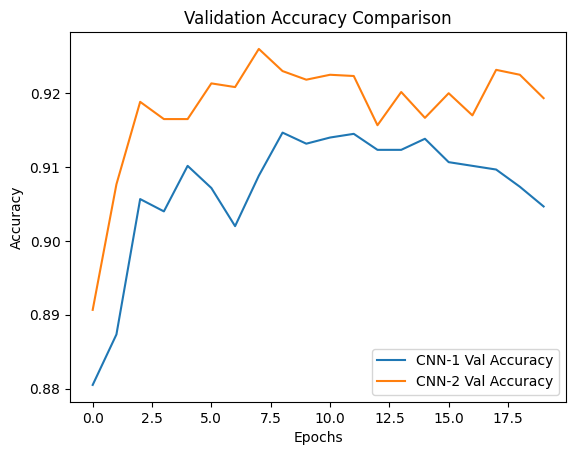

In [26]:
plt.plot(history_cnn1.history['val_accuracy'], label='CNN-1 Val Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='CNN-2 Val Accuracy')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()